In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os 

In [109]:

files_to_read = os.listdir('delta_change_from_cluster')
delta_df = pd.DataFrame(columns=['Name', 'Delta', 'Array'])
index = 0
for i in files_to_read:
    delta = round(float(i.split('eq')[1][1:].replace('_','.')), 3)
    name = 'delta=' + str(delta)
    file = os.path.join('delta_change_from_cluster', i)
    data = pd.read_csv(file)
    delta_df.at[index, 'Name'] = name
    delta_df.at[index, 'Delta'] = delta
    delta_df.at[index, 'Array'] = data[data.columns[0]].to_numpy()
    index +=1
delta_df = delta_df.sort_values('Delta')
delta_df.index = np.arange(len(delta_df))

In [110]:
delta_df

,Name,Delta,Array
0,delta=0.25,0.25,"[69.156, nan, 50.237, nan, 98.991, nan, nan, n..."
1,delta=0.333,0.333,"[65.129, nan, nan, nan, 52.135, nan, nan, nan,..."
2,delta=0.5,0.5,"[69.987, 44.229, 60.425, 71.929, 63.275, 73.69..."
3,delta=1.0,1.0,"[32.925, 36.249, 38.049, 40.841, 46.735, 38.86..."
4,delta=2.0,2.0,"[17.976, 18.808, 16.254, 16.272000000000002, 1..."
5,delta=3.0,3.0,"[12.495, 10.942, 14.672, 14.029, 15.552, 12.59..."
6,delta=4.0,4.0,"[9.416, 12.607, 8.804, 9.501, 9.4, 10.374, 11...."


In [121]:
labels

[0.25, 0.333, 0.5, 1.0, 2.0, 3.0, 4.0]

[Text(0, 0, '0.25'),
 Text(1, 0, '0.333'),
 Text(2, 0, '0.5'),
 Text(3, 0, '1.0'),
 Text(4, 0, '2.0'),
 Text(5, 0, '3.0'),
 Text(6, 0, '4.0')]

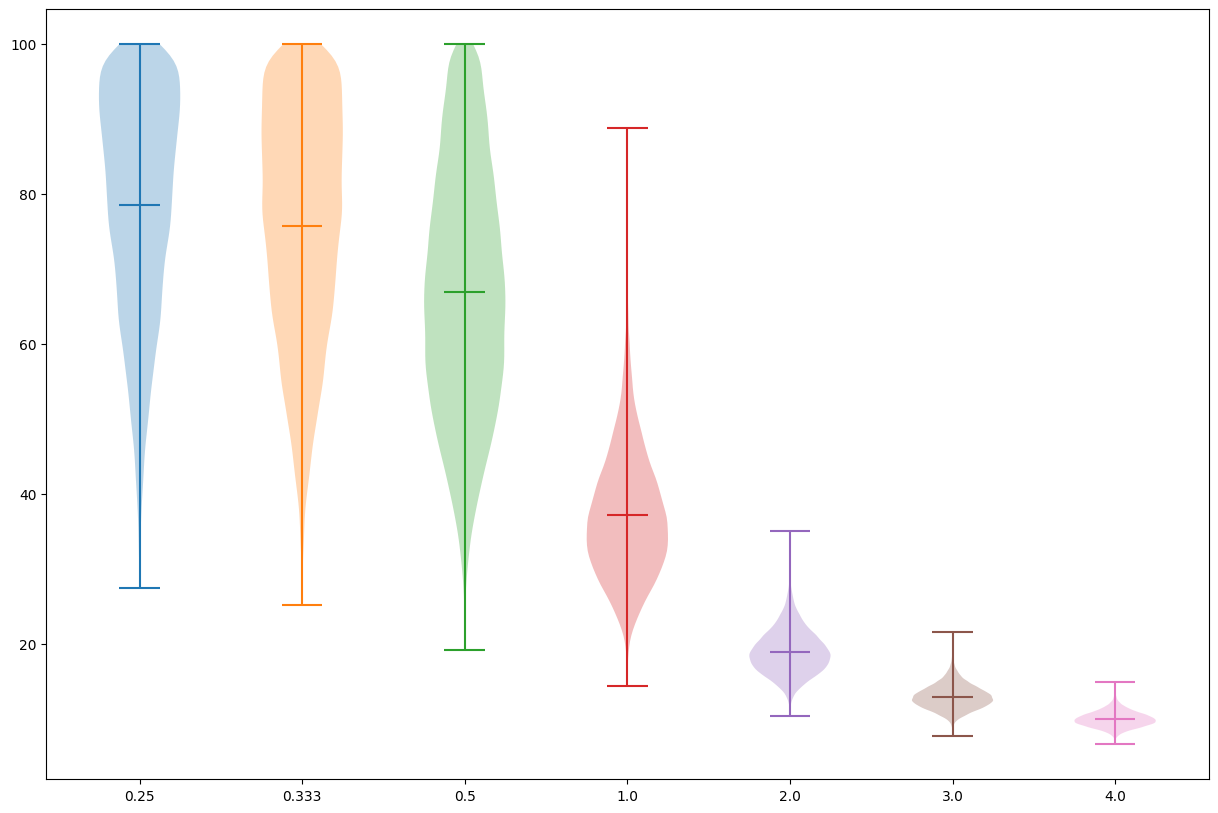

In [124]:
fig, ax = plt.subplots(figsize = (15,10))
labels = []
for i in delta_df.index:
    name = delta_df.at[i, 'Name']
    delta = delta_df.at[i, 'Delta']
    data = delta_df.at[i, 'Array']
    labels.append(delta)
    non_nan = data[~np.isnan(data)]
    ax.violinplot(non_nan, [i], showmeans=True)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)